# Validation and Verification of the 25mm collimator simulation

Here we prowide code and output which verifies and validates the 25mm collimator simulation. We're using simulation phase space file output and input to check the validity of the result

In [1]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import BEAMphsf
from H1Du import H1Du

%matplotlib inline

(6188124, 6188124.0)


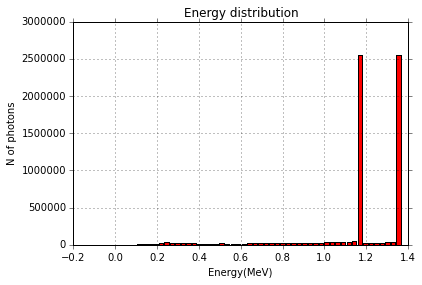

In [3]:
with open("C25.egsphsp1", "rb") as phsf:
    
    m, NPPHSP, NPHOTPHSP, EKMAX, EKMIN, NINCP = BEAMphsf.read_header(phsf)    

    he = H1Du(50, 0.01, 1.33)

    for i in range (0, NPPHSP):
        (LATCH, E, X, Y, U, V, W, WT, ZLAST) = BEAMphsf.read_record_long(phsf)
        if LATCH == 8388608: #8388608=2^23, this is photon, see PIRS-509, page #96
            if E<0:
                E = -E

            he.fill(E, WT)

    print(he.nof_events(), he.integral())

    X = []
    Y = []

    step = he.step()
    for i in range (-1, he.size()+1):
        x = he.lo() + (float(i) + 0.5)*step
        d = he[i] # data from bin with index i
        y = d[0]  # first part of bin is collected weights
        X.append(x)
        Y.append(y)

    width = 0.8*step
    p1 = plt.bar(X, Y, width, color='r')

    plt.xlabel('Energy(MeV)')
    plt.ylabel('N of photons')
    plt.title('Energy distribution')

    plt.grid(True);
    plt.tick_params(axis='x', direction='out')
    plt.tick_params(axis='y', direction='out')

    plt.show()


m=0.0258164673413
b=0.0491959521619


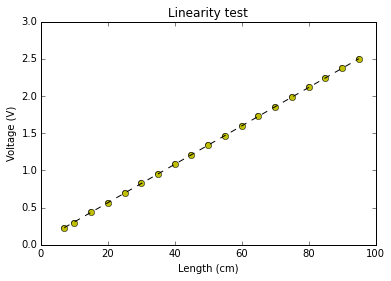

In [2]:
# code below demonstrates...

x = [7,10,15,20,25,30,35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
y= [0.228,0.298,0.441,0.568,0.697,0.826,0.956, 1.084, 1.211, 1.339,1.468, 1.599, 1.728, 1.851, 1.982, 2.115, 2.244, 2.375, 2.502]
plt.scatter(x, y)
plt.title('Linearity test')
plt. xlabel('Length (cm)')
plt. ylabel('Voltage (V)')
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
m,b = np.polyfit(x, y, 1)
print ('m={0}'.format(m))
print ('b={0}'.format(b))
plt.show()